In [1]:
import config as config
from src.dataset.bids import create_bids_dataset
from src.pipelines.p100_pipeline import P100AnalysisPipeline
import config as config
from bids import BIDSLayout

In [2]:
if config.P_100_ANALYSIS:
        visual = {
            "label": "Visual Change",
            "trial_type": "Stimulus",
            "tmin": -0.2,
            "tmax": 0.5,
            "trial_mode": "",
            "trial_unit": "Words",
            "experiment_mode": "Experiment",
            "trial_boundary": "Start",
            "modality": "Pictures"
        }

        rest = {
            "label": "No Visual Change",
            "trial_type": "Fixation",
            "tmin": -0.2,
            "tmax": 0.5,
            "trial_mode": "",
            "trial_unit": "Words",
            "experiment_mode": "Experiment",
            "trial_boundary": "Start",
            "modality": "Pictures",
            "time_window": (0.08, 0.12)  # Optional window for P100
        }

        layout = BIDSLayout(config.BIDS_DIR, validate=True)
        subject_ids = layout.get_subjects()

        for sub in subject_ids:
            session_ids = layout.get_sessions(subject=sub)  # or any other subject
            for ses in session_ids:
                pipeline = P100AnalysisPipeline(
                    subject_id=sub,
                    session_id=ses,
                    condition1_config=visual,
                    condition2_config=rest,
                    channels = ['PO3', 'POz', 'PO4']
                )

                pipeline.run(save_csv=True)

╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-01 ses-01

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.114s, peak=2.66µV, mean=0.09µV
No Visual Change P100: latency=0.096s, peak=0.80µV, mean=-0.78µV
Initializing Plotter
Results saved to p100_results/sub-01_ses-01_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-02 ses-01

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=4.93µV, mean=0.91µV
No Visual Change P100: latency=0.120s, peak=1.20µV, mean=-1.88µV
Initializing Plotter
Results saved to p100_results/sub-02_ses-01_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-03 ses-01

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.109s, peak=5.23µV, mean=3.07µV
No Visual Change P100: latency=0.080s, peak=0.23µV, mean=-2.01µV
Initializing Plotter
Results saved to p100_results/sub-03_ses-01_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-04 ses-01

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=4.85µV, mean=1.90µV
No Visual Change P100: latency=0.110s, peak=2.23µV, mean=1.12µV
Initializing Plotter
Results saved to p100_results/sub-04_ses-01_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-04 ses-02

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=2.78µV, mean=0.42µV
No Visual Change P100: latency=0.080s, peak=0.83µV, mean=0.23µV
Initializing Plotter
Results saved to p100_results/sub-04_ses-02_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-05 ses-01

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=1.41µV, mean=-0.92µV
No Visual Change P100: latency=0.119s, peak=1.34µV, mean=-0.29µV
Initializing Plotter
Results saved to p100_results/sub-05_ses-01_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-05 ses-02

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=1.63µV, mean=-1.51µV
No Visual Change P100: latency=0.120s, peak=0.57µV, mean=-0.74µV
Initializing Plotter
Results saved to p100_results/sub-05_ses-02_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-06 ses-01

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=8.48µV, mean=4.58µV
No Visual Change P100: latency=0.120s, peak=-4.02µV, mean=-5.09µV
Initializing Plotter
Results saved to p100_results/sub-06_ses-01_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-06 ses-02

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=10.87µV, mean=4.85µV
No Visual Change P100: latency=0.086s, peak=0.05µV, mean=-1.22µV
Initializing Plotter
Results saved to p100_results/sub-06_ses-02_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-07 ses-01

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=4.77µV, mean=0.79µV
No Visual Change P100: latency=0.109s, peak=-0.64µV, mean=-1.04µV
Initializing Plotter
Results saved to p100_results/sub-07_ses-01_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-08 ses-01

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=14.02µV, mean=7.63µV
No Visual Change P100: latency=0.120s, peak=2.75µV, mean=1.13µV
Initializing Plotter
Results saved to p100_results/sub-08_ses-01_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-09 ses-01

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=7.43µV, mean=1.64µV
No Visual Change P100: latency=0.120s, peak=0.12µV, mean=-2.05µV
Initializing Plotter
Results saved to p100_results/sub-09_ses-01_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-09 ses-02

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=3.72µV, mean=0.43µV
No Visual Change P100: latency=0.120s, peak=0.64µV, mean=0.05µV
Initializing Plotter
Results saved to p100_results/sub-09_ses-02_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-10 ses-01

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=8.55µV, mean=3.66µV
No Visual Change P100: latency=0.120s, peak=2.24µV, mean=0.52µV
Initializing Plotter
Results saved to p100_results/sub-10_ses-01_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-11 ses-01

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.087s, peak=2.04µV, mean=0.98µV
No Visual Change P100: latency=0.117s, peak=1.68µV, mean=0.55µV
Initializing Plotter
Results saved to p100_results/sub-11_ses-01_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-12 ses-01

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=2.54µV, mean=0.80µV
No Visual Change P100: latency=0.120s, peak=3.01µV, mean=1.85µV
Initializing Plotter
Results saved to p100_results/sub-12_ses-01_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-12 ses-02

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.116s, peak=5.09µV, mean=2.36µV
No Visual Change P100: latency=0.120s, peak=5.76µV, mean=4.35µV
Initializing Plotter
Results saved to p100_results/sub-12_ses-02_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-13 ses-01

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=13.92µV, mean=4.16µV
No Visual Change P100: latency=0.120s, peak=0.09µV, mean=-2.03µV
Initializing Plotter
Results saved to p100_results/sub-13_ses-01_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-13 ses-02

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=14.22µV, mean=4.54µV
No Visual Change P100: latency=0.120s, peak=0.57µV, mean=-3.09µV
Initializing Plotter
Results saved to p100_results/sub-13_ses-02_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-14 ses-01

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=4.98µV, mean=-0.58µV
No Visual Change P100: latency=0.101s, peak=0.38µV, mean=-0.11µV
Initializing Plotter
Results saved to p100_results/sub-14_ses-01_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-15 ses-01

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
130 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 130 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=2.41µV, mean=-0.90µV
No Visual Change P100: latency=0.104s, peak=2.16µV, mean=1.07µV
Initializing Plotter
Results saved to p100_results/sub-15_ses-01_p100_Visual Change_No Visual Change.csv


╭─────────────────────────────────────────╮
│ 🚀 Initializing BIDSDatasetReader Class │
╰─────────────────────────────────────────╯

Loading Processed EEG Data: sub-15 ses-02

╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
61 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 61 events and 701 original time points ...
0 bad epochs dropped


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

Creating EPOCHS

        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
61 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 61 events and 701 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visual Change P100: latency=0.120s, peak=2.45µV, mean=-1.18µV
No Visual Change P100: latency=0.080s, peak=-0.55µV, mean=-3.60µV
Initializing Plotter
Results saved to p100_results/sub-15_ses-02_p100_Visual Change_No Visual Change.csv


In [3]:
import pandas as pd
from glob import glob
import os

In [4]:
csv_dir = '/home/owaismujtaba/projects/elsavier/p100_results'
csv_files = [f for f in glob(os.path.join(csv_dir, "*.csv")) if f.endswith("Visual_Rest.csv")]

# Load and concatenate all CSV files
all_dfs = [pd.read_csv(f) for f in csv_files]
combined_df = pd.concat(all_dfs, ignore_index=True)

# Save the result
output_path = os.path.join(csv_dir, "combined_p100_results_Visual_Rest.csv")
combined_df.to_csv(output_path, index=False)

print(f"Combined CSV saved to: {output_path}")

Combined CSV saved to: /home/owaismujtaba/projects/elsavier/p100_results/combined_p100_results_Visual_Rest.csv


In [5]:
csv_files

['/home/owaismujtaba/projects/elsavier/p100_results/combined_p100_results_Visual_Rest.csv',
 '/home/owaismujtaba/projects/elsavier/p100_results/sub-13_ses-01_p100_Visual_Rest.csv',
 '/home/owaismujtaba/projects/elsavier/p100_results/sub-06_ses-01_p100_Visual_Rest.csv',
 '/home/owaismujtaba/projects/elsavier/p100_results/sub-04_ses-02_p100_Visual_Rest.csv',
 '/home/owaismujtaba/projects/elsavier/p100_results/sub-11_ses-01_p100_Visual_Rest.csv',
 '/home/owaismujtaba/projects/elsavier/p100_results/sub-09_ses-01_p100_Visual_Rest.csv',
 '/home/owaismujtaba/projects/elsavier/p100_results/sub-02_ses-01_p100_Visual_Rest.csv',
 '/home/owaismujtaba/projects/elsavier/p100_results/sub-07_ses-01_p100_Visual_Rest.csv',
 '/home/owaismujtaba/projects/elsavier/p100_results/sub-08_ses-01_p100_Visual_Rest.csv',
 '/home/owaismujtaba/projects/elsavier/p100_results/sub-10_ses-01_p100_Visual_Rest.csv',
 '/home/owaismujtaba/projects/elsavier/p100_results/sub-15_ses-01_p100_Visual_Rest.csv',
 '/home/owaismujta

In [6]:
combined_df.head()

,subject_id,session_id,condition,latency,peak,mean
0,13,1,Visual,0.12,13.915362,4.157586
1,13,1,Rest,0.12,0.093171,-2.034094
2,6,1,Visual,0.12,8.475308,4.576022
3,6,1,Rest,0.12,-4.020665,-5.088031
4,4,2,Visual,0.12,2.778097,0.424015


/tmp/ipykernel_1669217/3575732913.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_1669217/3575732913.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_1669217/3575732913.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontweight='bold')
/tmp/ipykernel_1669217/3575732913.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(axes[0].get_yticklabels(), fontweight='bold')
/tmp/ipykernel_1669217/3575732913.py:80:

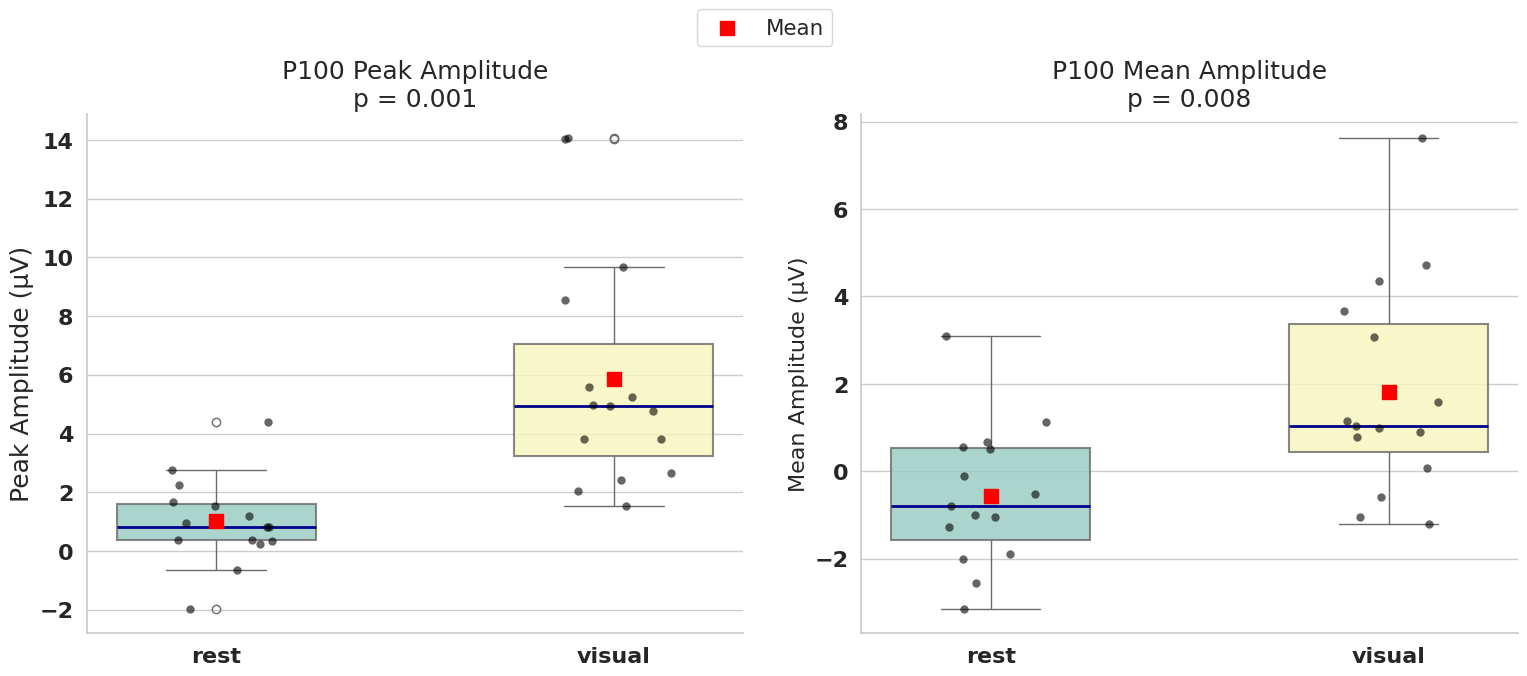

T-test (Peak): -4.3399233541684765 p-value: 0.0006790726089322875
T-test (Mean): -3.0900810613569027 p-value: 0.007988219454275847


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# Load data
df = pd.read_csv(output_path)

# Normalize condition names
df['condition'] = df['condition'].str.lower()

# Aggregate (mean) per subject and condition
df_avg = df.groupby(['subject_id', 'condition'], as_index=False).mean()

# Pivot for paired t-tests
peak_pivot = df_avg.pivot(index='subject_id', columns='condition', values='peak')
mean_pivot = df_avg.pivot(index='subject_id', columns='condition', values='mean')

# Paired t-tests
t_peak, p_peak = ttest_rel(peak_pivot['rest'], peak_pivot['visual'], nan_policy='omit')
t_mean, p_mean = ttest_rel(mean_pivot['rest'], mean_pivot['visual'], nan_policy='omit')

# Plot style
sns.set(style="whitegrid", font_scale=1.4, rc={"axes.labelsize": 16, "axes.titlesize": 18, "xtick.labelsize": 14, "ytick.labelsize": 14})

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Function to add mean squares
def add_mean_squares(ax, data, y_col, x_col='condition', color='red'):
    means = data.groupby(x_col)[y_col].mean()
    for i, (cond, mean_val) in enumerate(means.items()):
        ax.scatter(i, mean_val, marker='s', s=100, color=color, zorder=5, label='Mean' if i == 0 else "")

# Plot 1: Peak Amplitude
sns.boxplot(
    data=df_avg, x='condition', y='peak', ax=axes[0], 
    palette='Set3', width=0.5, 
    boxprops=dict(alpha=0.8, linewidth=1.5),
    medianprops=dict(linewidth=2, color='darkblue')
)
sns.stripplot(
    data=df_avg, x='condition', y='peak', ax=axes[0], 
    color='black', size=6, jitter=0.15, alpha=0.6
)
add_mean_squares(axes[0], df_avg, y_col='peak')
axes[0].set_title(f"P100 Peak Amplitude\np = {p_peak:.3f}", fontsize=18)
axes[0].set_ylabel("Peak Amplitude (µV)", fontsize=18)
axes[0].set_xlabel("")
axes[0].tick_params(axis='both', which='major', labelsize=16)
sns.despine(ax=axes[0])

# Plot 2: Mean Amplitude
sns.boxplot(
    data=df_avg, x='condition', y='mean', ax=axes[1], 
    palette='Set3', width=0.5, 
    boxprops=dict(alpha=0.8, linewidth=1.5),
    medianprops=dict(linewidth=2, color='darkblue')
)
sns.stripplot(
    data=df_avg, x='condition', y='mean', ax=axes[1], 
    color='black', size=6, jitter=0.15, alpha=0.6
)
add_mean_squares(axes[1], df_avg, y_col='mean')
axes[1].set_title(f"P100 Mean Amplitude\np = {p_mean:.3f}", fontsize=18)
axes[1].set_ylabel("Mean Amplitude (µV)", fontsize=16)
axes[1].set_xlabel("")
axes[1].tick_params(axis='both', which='major', labelsize=16)
sns.despine(ax=axes[1])

# Optional: Add legend just once
handles, labels = axes[1].get_legend_handles_labels()
if 'Mean' in labels:
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=1)

plt.tight_layout(pad=2.0)

axes[0].set_xticklabels(axes[0].get_xticklabels(), fontweight='bold')
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontweight='bold')

axes[1].set_xticklabels(axes[1].get_xticklabels(), fontweight='bold')
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontweight='bold')
plt.savefig('p100_visual_rest.png', dpi=600)
plt.show()

print("T-test (Peak):", t_peak, "p-value:", p_peak)
print("T-test (Mean):", t_mean, "p-value:", p_mean)
